In [7]:
import os
TEST_RESULT_DIR = 'testResults'
artists = [x.upper() for x in os.listdir(os.path.join(os.getcwd(), 'vocalProfiles'))]
fexcel_files = os.listdir(os.path.join(os.getcwd(), 'testResults'))
strange_tokens = {
    'The_Notorious_BIG_Juicy_Acapella' : 'BiggieCoverBiggie',
    'ElvisVocalsOnly' : 'ElvisCoverElvis',
    'TaylorVocals' : 'TaylorCoverTaylor',
    'FreddieVocals' : 'FreddieCoverFreddie',
    'Miley_Cyrus_Party_in_the_USA' : 'MileyCoverMiley'
}

for file in fexcel_files:
    if 'Cover' not in file:
        for token in strange_tokens.keys():
            if token in file:
                k = file.index(token)
                os.rename(TEST_RESULT_DIR + '/' + file, 
                          TEST_RESULT_DIR + '/' + file[:k] + strange_tokens[token] + file[k+len(token):])

In [4]:
import pandas as pd

def compute_similarity_score(file, log=True):
    if file[0] == '.': return 0
    # if file in fexcel_files: continue
    csv = pd.read_csv(f'testResults/{file}')
    # sum up number of nonzero rows and their values
    total = 0
    non_zero_rows = 0
    for index, row in csv.iterrows():
        if row.iloc[1] != 0:
            total += row.iloc[1]
            non_zero_rows += 1

    art = ''
    for a in artists:
        if a in file:
            art = a
            tokens = file[len(art):]
            file = tokens.split('.')[0]
    if non_zero_rows != 0:
        if log:
            print(f'{art},{file}, {total/non_zero_rows}')
        return total/non_zero_rows
    else:
        if log:
            print(f'{art},{file}, 0')
        return 0

/var/folders/5g/zhrhz_x17_d1q64t0_mn5ykr0000gn/T/ipykernel_46249/3768315094.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
import os
'''
We partition into 5 separate dictionaries.
'''
song_data = {}
# compute indices for each artist
fexcel_files = os.listdir(os.path.join(os.getcwd(), 'testResults'))
artists = [x.upper() for x in os.listdir(os.path.join(os.getcwd(), 'vocalProfiles'))]

artist_indices = {
    'elvis' : 0,
    'freddie' : 1,
    'miley' : 2,
    'taylor' : 3,
    'biggie' : 4
}

profile_to_artist = {
    'taylorswift' : 'taylor',
    'mileycyrus' : 'miley',
    'freddiemercury' : 'freddie',
    'elvis' : 'elvis',
    'biggie' : 'biggie'
}


for file in fexcel_files:
    profile = ''
    if file[0] == '.': continue
    score = compute_similarity_score(file, log=False)
    
    for artist in artists:
        if artist in file and file.index(artist) == 0:
            profile = artist
            break
    assert len(profile) != 0
    # metadata = file.rstrip('.csv').lstrip(profile)
    metadata = file[len(profile):len(file) - len('.csv')]
    profile = profile_to_artist[profile.lower()]
    assert 'Cover' in metadata
    # print(metadata, file, profile, file.rstrip('.csv'))
    vocalist, original_singer = metadata.split('Cover')
    
    if original_singer not in song_data:
        song_data[original_singer] = [[
            -1 for _ in range(len(list(artist_indices.keys())))
        ] for _ in range(len(list(artist_indices.keys())))]

    row = artist_indices[profile.lower()]
    column = artist_indices[vocalist.lower()]
    
    # plot the score
    song_data[original_singer][row][column] = score

for song in song_data.keys():
    print(f'-----{song}-----')
    assert len(song_data[song]) == 5
    for row in song_data[song]:
        print(row)
        # do a check here, are there any values that are uninitialized?
        assert len(row) == 5
        for val in row:
            assert val != -1

-----Freddie-----
[0.3207690281309051, 0.24357691272958978, 0.1239122424478316, 0.0769739435903681, 0.09401995795113696]
[0, 0.3120119262035378, 0, 0, 0]
[0.22068142890930176, 0.11357792218526201, 0.3872930390940165, 0.36523121280569426, 0]
[0, 0, 0, 0.14510264655583585, 0]
[0, 0, 0, 0, 0.6146679416219181]
-----Miley-----
[0.5332005963695541, 0.5125368359250106, 0.0723198931267921, 0.2970915432899229, 0.14926393648211875]
[0, 0.7327469836275123, 0, 0, 0]
[0.07544577121734616, 0.1342873164901027, 0.5053900559219301, 0.46725910787064034, 0]
[0, 0, 0, 0.07314859496222595, 0]
[0.1312516265445285, 0, 0, 0, 0.47057585255226453]
-----Biggie-----
[0.7391452232961797, 0.19591594203082835, 0.09110039319747533, 0.054700466894334346, 0.17168696721394858]
[0, 0.43437352640733595, 0, 0, 0]
[0.07754744423760304, 0, 0.21527301365474485, 0.20627106801427977, 0]
[0, 0, 0, 0.23717113562992642, 0]
[0, 0, 0, 0, 0.7359289413947143]
-----Taylor-----
[0.6824089478382196, 0.4605838074403651, 0.2483612390664907

Freddie


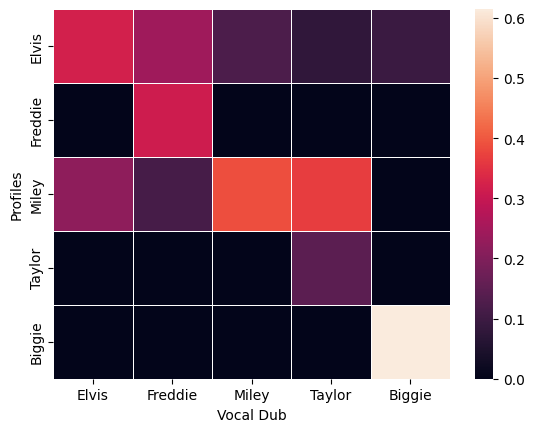

Miley


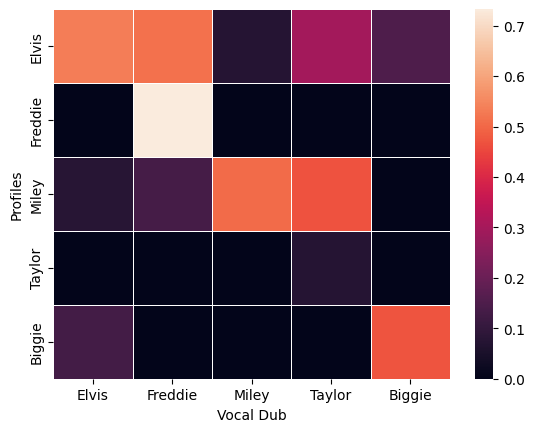

Biggie


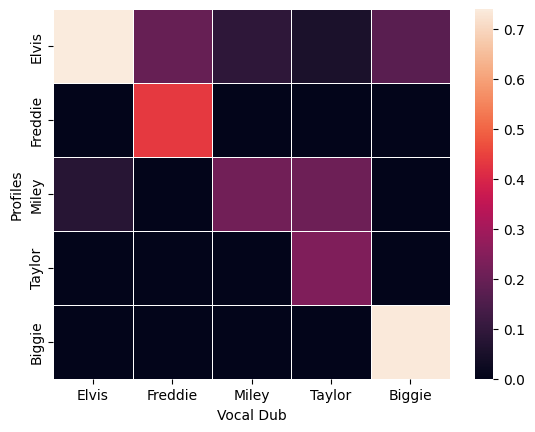

Taylor


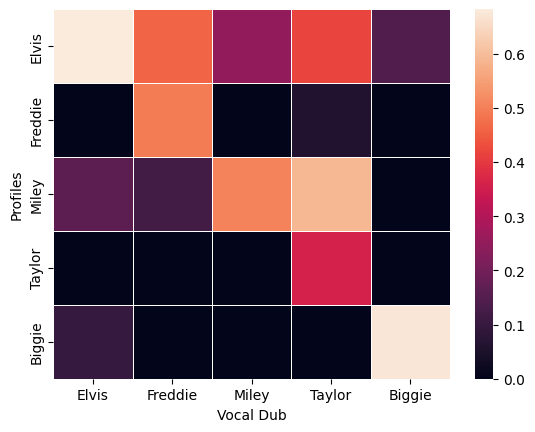

Elvis


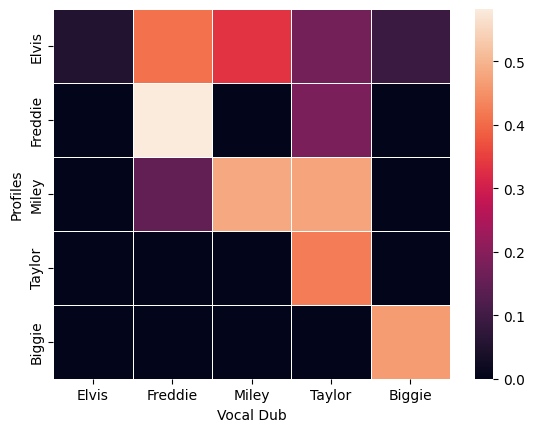

In [22]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
x_axis_labels = ['Elvis',
    'Freddie',
    'Miley',
    'Taylor',
    'Biggie']
y_axis_labels = ['Elvis',
    'Freddie',
    'Miley',
    'Taylor',
    'Biggie']

for index, song in enumerate(song_data.keys()):
    print(song)
    s = np.array(song_data[song])
    ax = sns.heatmap(s, linewidth=0.5, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Profiles')
    plt.xlabel('Vocal Dub')
    plt.savefig(f'{index}.png')
    plt.show()